# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Moritz Roth

Datum: 19.11.2023

Gruppe: 12

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie verhält sich die Temperatur, in meinem Getränk, über die Zeit?
Wie groß ist die Wermekapazität meines Getränks?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

Mein Versuch bestand aus zwei Tassen, welche mit Wasser gefüllt sind, und den vorgegebenen Forschungsmaterialien des FST.
In der linken Tasse befand sich heißes Wasser und in der rechten Tasse ganz normales Leitungswasser. Die Sensorn befanden sich in den Tassen, um die gemessene Temperatur an den Pi weiterzugeben.
Um meinen Versuch durchzuführen habe ich sichergestellt das beide Sensoren richtig im Wasser sind und das Wasser auch die passende Temperatur hat. Anschliesend habe ich mit meinem Handy einen Timer in der länge von 3 min gestartet und die Messung mit dem main.py Skript auf meinem Pc gestartet.Nach einiger zeit habe ich dann das heisse wasser in die Tasse mit dem kalten Wasser geschüttet und den Versuch weiterlaufen lassen. Nach 3 min habe ich den Verusch am main.py skript dann händisch gestoppt.

<img src="figures/IMG_4101.jpg" width="800">

## Versuchsauswertung

In [6]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [7]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path = "/home/pi/calorimetry_home/data/data_heat_capacity/data_heat_capacity.h5"

# DONE #

In [15]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py
sensor_data ={}
with h5py.File(path,'r') as file:
    # in raw data gehen
    raw_data_group = file['RawData']
    #Attribute der hdf5 Datei
    created_date = file.attrs.get('created')
    experiment = file.attrs.get('experiment')
    group_number = file.attrs.get('groupe_number')
    authors = file.attrs.get('authors')
    
    for sensor_uuid in raw_data_group:
        #auslesen der sensortemperaturen
        temperature_dataset = raw_data_group[sensor_uuid]['temperature']
        temperature = temperature_dataset[()]

        #Zeitschritte auslesen
        timestamp_dataset = raw_data_group[sensor_uuid]['timestamp']
        timestamp = timestamp_dataset[()]
        #Attribute sensor auslesen
        #sensor_dataset = raw_data_group[sensor_uuid]
        #sensor_name = sensor_dataset.attrs('name')
        #sensor_serial = sensor_dataset.attrs('serial')

        #dic erstellen
        sensor_data[sensor_uuid] = { 'temperature': temperature,'timestamp': timestamp}
        
print(sensor_data)        
file.close        
# DONE #

{'1ee826bc-ad10-6fa9-818b-5b87707a5a35': {'temperature': array([23.375 , 23.3125, 23.3125, 23.25  , 23.3125, 23.25  , 23.25  ,
       23.25  , 23.25  , 23.25  , 23.25  , 23.25  , 23.25  , 23.25  ,
       23.3125, 23.25  , 23.3125, 23.25  , 23.25  , 23.25  , 23.25  ,
       23.25  , 34.75  , 36.    , 36.75  , 37.1875, 37.5   , 37.6875,
       37.8125, 37.8125, 37.9375, 37.9375, 38.    , 38.    , 38.    ,
       37.9375]), 'timestamp': array([ 10.14209342,  15.77423358,  21.40599012,  27.03811407,
        32.70146656,  38.33399534,  43.96587634,  49.59778094,
        55.22946477,  60.86197758,  66.49399185,  72.12599564,
        77.75746584,  83.38952851,  89.02598548,  94.65346909,
       100.28546834, 105.91797686, 111.54946518, 117.18198276,
       122.81415486, 128.44599271, 134.07860804, 139.7101028 ,
       145.34206772, 150.97351313, 156.60599351, 162.23752618,
       167.90151906, 173.53412533, 179.16615677, 184.79799199,
       190.430305  , 196.06212974, 201.69397807, 207.32600

<bound method File.close of <Closed HDF5 file>>

#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


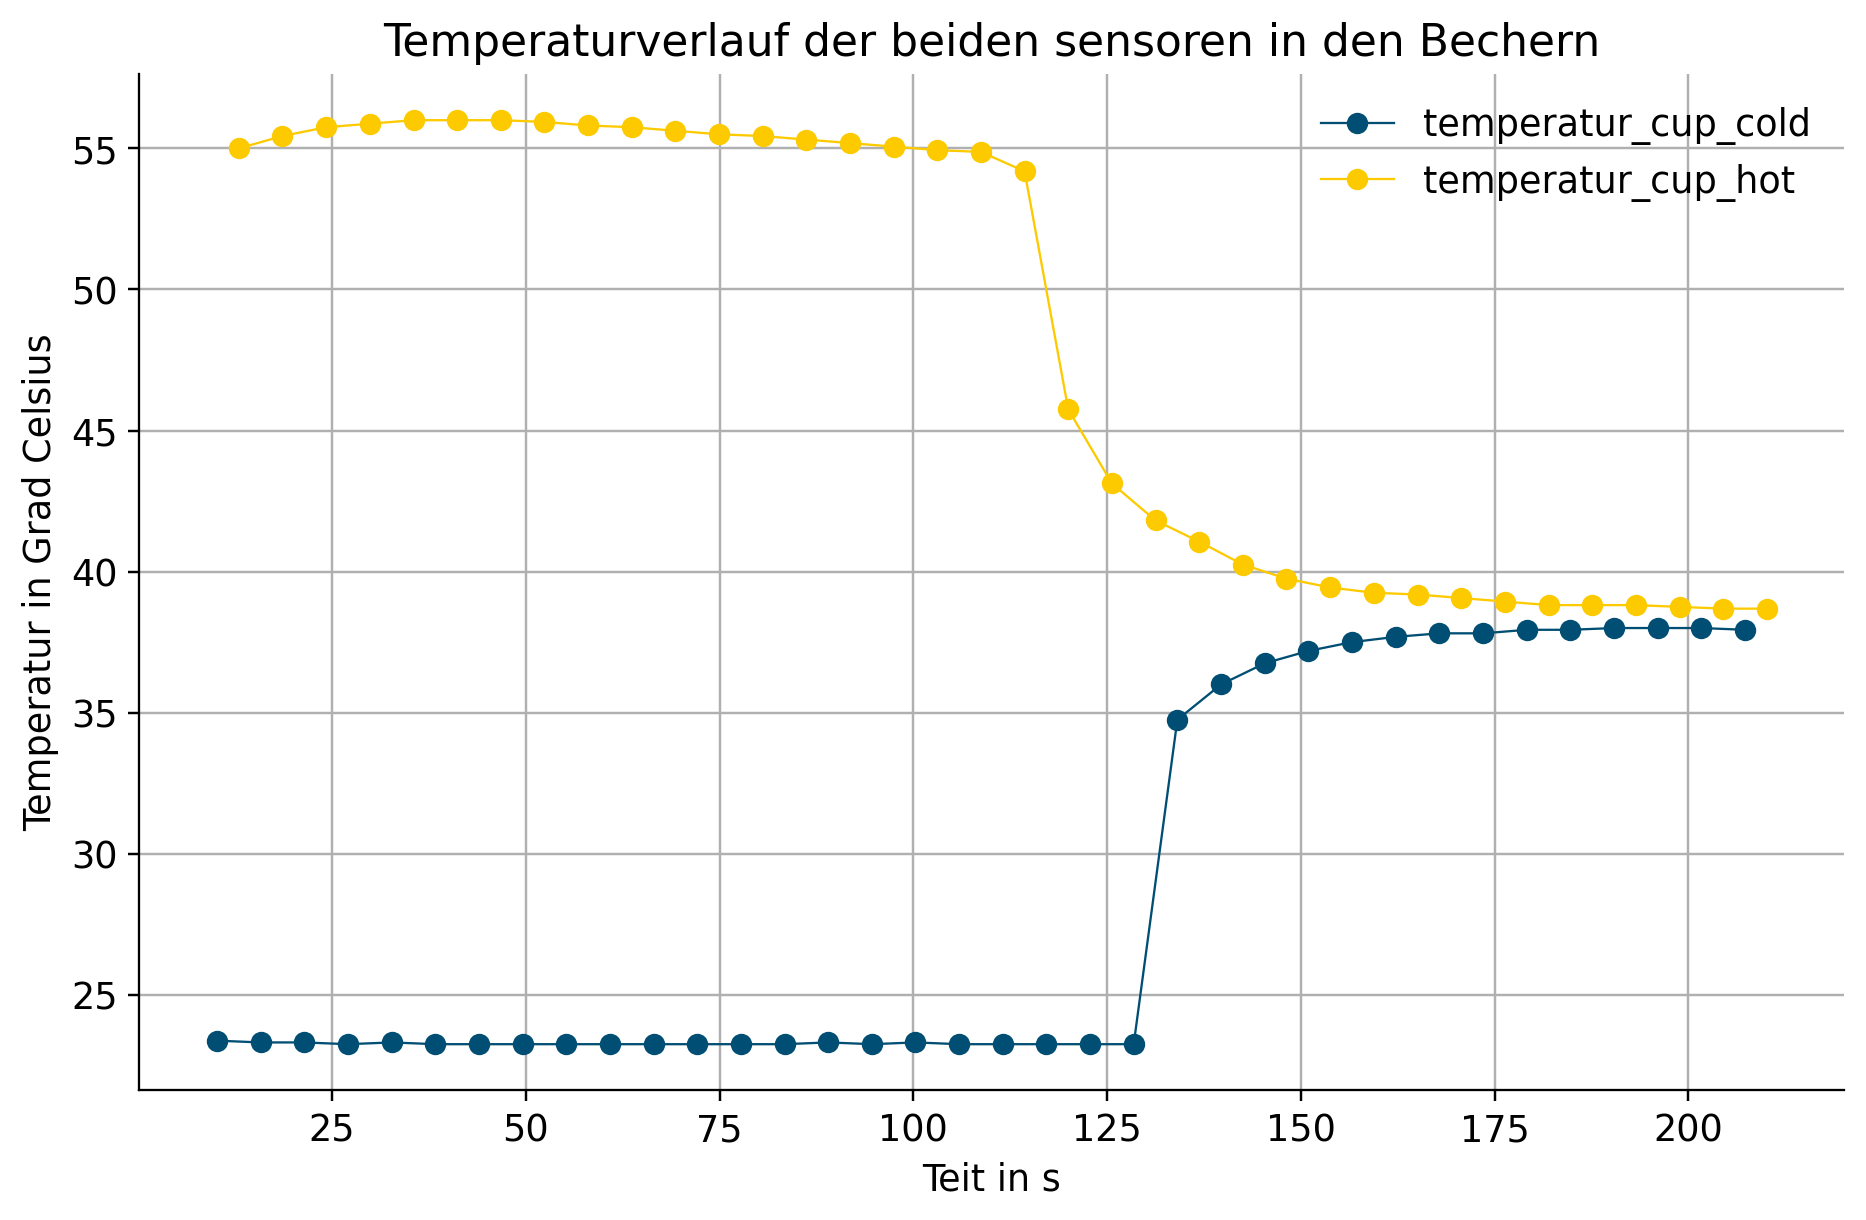

<Figure size 1471.8x1012 with 0 Axes>

In [9]:
# TODO: Use the temperature and time data for plotting
import matplotlib.pyplot as plt
import numpy as np

#Daten extrahieren
sensor1_uuid = '1ee826bc-ad10-6fa9-818b-5b87707a5a35'
sensor2_uuid = '1ee826c0-782e-69ed-9f87-e60f2d81be9d'

sensor1_data =sensor_data[sensor1_uuid]
sensor2_data =sensor_data[sensor2_uuid]

time1 = sensor1_data['timestamp']
temperature1 = sensor1_data['temperature']

time2 = sensor2_data['timestamp']
temperature2 = sensor2_data['temperature']

#Plot erstellen
plt.figure(figsize=(10,6))
plt.plot(time1, temperature1, label='temperatur_cup_cold', marker='o')
plt.plot(time2, temperature2, label='temperatur_cup_hot', marker='o')

#Achsentitel und Diagrammtitel hinzufügen        
plt.xlabel('Teit in s')
plt.ylabel('Temperatur in Grad Celsius')
plt.title('Temperaturverlauf der beiden sensoren in den Bechern')
#Legende hinzufügen
plt.legend()
#gitter hinzufügen
plt.grid(True)
#diagramm zeigen
plt.show()
#speichern des Graphen als svg
plt.savefig('Temperaaturverläufe_der_Gefäße')

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [10]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
import json
from functions import m_json
from functions import m_pck
path_mass ='/home/pi/calorimetry_home/datasheets/probe_heat_capacity.json'
#json aufrufen
with open(path_mass,'r') as file:
    mass_json=json.load(file)

#metadata aus json auslesen
mass_ges = mass_json.get('probe',{}).get('metadata',{})
print(mass_ges)

#einzelmassen
mass_add = 0.15
mass_cup = 0.15
# DONE #

Wassermasse 300g


#### (iV) Anfangs- und Endwert der Temperatur

In [11]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
#Anfangs und Endwerte definieren
T_1 = temperature1[0]
T_2 = temperature2[0]

T_M_1 = temperature1[-1]
T_M_2 = temperature2[-1]

#Mischungstemperatur berechnen
T_M = (T_M_1 + T_M_2)/2

#ergebnisse printen
print(T_M)
print(T_1)
print(T_2)
# DONE #

38.3125
23.375
55.0


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [12]:
# TODO: Calculate heat capacity of the calorimeter
C = ((mass_add*water_heat_capa*(T_2-T_M))/(T_M-T_1))-mass_cup*water_heat_capa

# DONE #

#### (Vi) Ergebnis

In [17]:
# TODO: Print result
print("Wärmekapazität beträgt:",C)
print("Experiment Informationen:Autor", authors,"Gruppe",group_number,"durchgeführt am", created_date)
# DONE #

Wärmekapazität beträgt: 0.07345606694560669
Experiment Informationen:Autor Moritz Roth Gruppe None durchgeführt am 2023-11-18 19:01:34


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Mithilfe des ersten Hauptsatzes der Thermodinamik konnte man die Wärmekapazität des Kalorimeters ausrechnen. Außerdem konnten wir festtellen das die Mischungstemperatur zweier Flüssigkeiten genau zwischen ihren aktuellen Temperaturen befindet.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [ ]:
Durch diesen Versuch habe ich gelernt mit Sensoren Temperaturen zu messen und diese dann grafisch darzustellen. Desweitern konnte ich mir ein thermodinamischen Vorgang der im alltag öfters Vorkommt näher bringen.